In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
test_dir = "/content/drive/MyDrive/sem 6/tarp/Fire-Detection"
train_dir = "/content/drive/MyDrive/sem 6/tarp/fire_dataset"

In [ ]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip=True,
                                  rotation_range=30,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = training_datagen.flow_from_directory(train_dir,
                                         target_size=(224,224),
                                         class_mode='categorical',
                                         batch_size = 64)

Found 999 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(      
                                           test_dir,
                                           target_size=(224,224),
                                           class_mode='categorical',
                                           batch_size= 16)

Found 651 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)), tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
train_generator,
steps_per_epoch = 15,
epochs = 25,
validation_data = validation_generator,
validation_steps = 15
)

Epoch 1/25


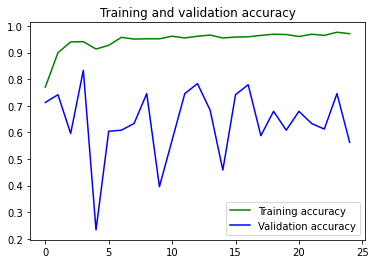

<Figure size 432x288 with 0 Axes>

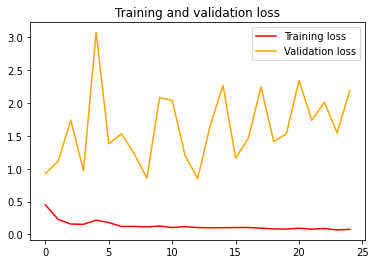

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==1, max(classes[0]))

In [ ]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/sem 6/tarp/saved_model/my_model') 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

new_model = tf.keras.models.load_model('/content/drive/MyDrive/sem 6/tarp/saved_model/my_model')

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = new_model.predict(x)
  print(np.argmax(classes[0])==1, max(classes[0]))

Saving WIN_20220421_10_36_47_Pro.jpg to WIN_20220421_10_36_47_Pro.jpg
True 0.9479829


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/sem 6/tarp/fire_dataset"
training_datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.15,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
VALIDATION_DIR = "/content/drive/MyDrive/sem 6/tarp/fire_dataset"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                      target_size=(224,224),
                                                      shuffle = True,
                                                      class_mode='categorical',
                                                      batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(224,224),
                                                              class_mode='categorical',
                                                              shuffle = True,
                                                              batch_size= 14)

Found 999 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout


input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    epochs = 20,
                    validation_data = validation_generator,
                    validation_steps = 8)

87924736/87910968 [==============================] - 1s 0us/step
Epoch 1/20
8/8 [==============================] - 204s 22s/step - loss: 8.5173 - acc: 0.6727 - val_loss: 0.1515 - val_acc: 0.9375
Epoch 2/20
8/8 [==============================] - 49s 6s/step - loss: 0.1802 - acc: 0.9319 - val_loss: 0.2373 - val_acc: 0.9375
Epoch 3/20
8/8 [==============================] - 46s 6s/step - loss: 0.1850 - acc: 0.9319 - val_loss: 0.2965 - val_acc: 0.9018
Epoch 4/20
8/8 [==============================] - 49s 6s/step - loss: 0.1499 - acc: 0.9530 - val_loss: 0.0936 - val_acc: 0.9732
Epoch 5/20
8/8 [==============================] - 47s 6s/step - loss: 0.4637 - acc: 0.8368 - val_loss: 0.3077 - val_acc: 0.9375
Epoch 6/20
8/8 [==============================] - 46s 6s/step - loss: 0.2128 - acc: 0.9269 - val_loss: 0.1009 - val_acc: 0.9732
Epoch 7/20
8/8 [==============================] - 46s 6s/step - loss: 0.1356 - acc: 0.9560 - val_loss: 0.7973 - val_acc: 0.7321
Epoch 8/20
8/8 [=====================

In [ ]:
for layer in model.layers[:249]:
  layer.trainable = False

for layer in model.layers[249:]:
  layer.trainable = True

#Recompile the model for these modifications to take effect

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


history = model.fit(train_generator,
                  steps_per_epoch = 8,
                  epochs = 10,
                  validation_data = validation_generator,
                  validation_steps = 8)
print(len(base_model.layers))

Epoch 1/10
8/8 [==============================] - 56s 6s/step - loss: 1.2473 - acc: 0.4825 - val_loss: 0.0194 - val_acc: 1.0000
Epoch 2/10
8/8 [==============================] - 46s 5s/step - loss: 1.0228 - acc: 0.5526 - val_loss: 0.0586 - val_acc: 0.9821
Epoch 3/10
8/8 [==============================] - 48s 6s/step - loss: 0.8017 - acc: 0.6146 - val_loss: 0.0338 - val_acc: 0.9911
Epoch 4/10
8/8 [==============================] - 48s 6s/step - loss: 0.6286 - acc: 0.6867 - val_loss: 0.0446 - val_acc: 0.9911
Epoch 5/10
8/8 [==============================] - 47s 6s/step - loss: 0.5108 - acc: 0.7538 - val_loss: 0.0428 - val_acc: 0.9911
Epoch 6/10
8/8 [==============================] - 48s 6s/step - loss: 0.4258 - acc: 0.8218 - val_loss: 0.0834 - val_acc: 0.9732
Epoch 7/10
8/8 [==============================] - 48s 6s/step - loss: 0.3672 - acc: 0.8519 - val_loss: 0.0699 - val_acc: 0.9821
Epoch 8/10
8/8 [==============================] - 47s 6s/step - loss: 0.3342 - acc: 0.8839 - val_loss: 0

In [ ]:
model.save('/content/drive/MyDrive/sem 6/tarp/saved_model/my_model2') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/sem 6/tarp/saved_model/my_model2/assets


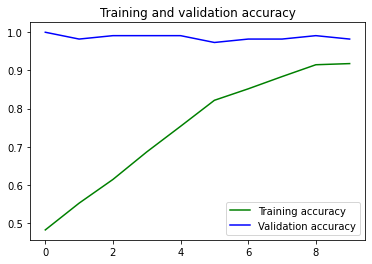

<Figure size 432x288 with 0 Axes>

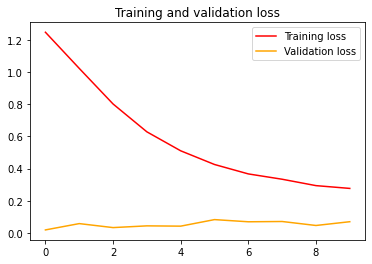

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

new_model = tf.keras.models.load_model('/content/drive/MyDrive/sem 6/tarp/saved_model/my_model2')

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = new_model.predict(x)
  print(np.argmax(classes[0])==1, max(classes[0]))

Saving non_fire.4.png to non_fire.4.png
Saving non_fire.3.png to non_fire.3.png
Saving non_fire.2.png to non_fire.2.png
False 0.5694627
False 0.9949521
True 0.514064
